In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Y, X = np.mgrid[-2:2:0.005, -2:2:0.005]
Z = X+1j*Y
Z = tf.constant(Z.astype("complex64"))
zs = tf.Variable(Z)
ns = tf.Variable(tf.zeros_like(Z, "float32"))

In [3]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
c = complex(0.0,0.75)
zs_ = zs*zs - c
not_diverged = tf.abs(zs_) < 4
step = tf.group(zs.assign(zs_),ns.assign_add(tf.cast(not_diverged, "float32")))
for i in range(200): step.run()

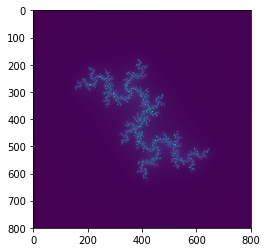

In [4]:
plt.imshow(ns.eval())
plt.show()